# Predictive Churn
The overall goal is to increase customer retention  by determining why customers churn. To do this the goal of this model will be to identify features that are the must helpful and accurate in determining customers who will Churn.  
In this example I will use Random forest to determine features selection.

# Part II: Method Justification


Prediction method used for this review will be random forest. Random forest is a classification technique using several decisions trees. It uses bagging or bootstrapping or more simply put taking several random samples using replacement to infer the population.

The goal of this is to create an uncorrelated "forest" of decision trees to predict using multiple layers rather than as single decision tree. The output expected is a measure of importance for each feature to assist in selecting feature or features that will assist in predicting Churn.


An assumption of this model is that the inputs or features are continuous and the target variable is discrete. 

### Packages and Libraries 


##### system
Used to navigate find files change directories

- import sys, os 

##### Data prep and manipulation
Used to merge filter manipulate and prep data

- import pandas as pd
- import numpy as np

###### stats
Used to understand data with statistical aggregates and analysis

- import scipy.stats as stats
- import statsmodels.api as sm

##### Visualization
Used to visually represent data

- import seaborn as sns
- import matplotlib as mpl
- import matplotlib.pyplot as plt
- from matplotlib import rcParams
- plt.rcParams.update({'figure.max_open_warning': 0})

#### Preprocessing Feature Selection
Used to scale, normalize and feature select for modeling

- from sklearn.preprocessing import MinMaxScaler
- from sklearn.preprocessing import StandardScaler
- from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
- from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split, StratifiedShuffleSplit

#### Model Selection
Used to insatiate the model and make predictions
- from sklearn.ensemble import RandomForestRegressor
- from sklearn.ensemble import RandomForestClassifier


#### Model Evaluation
Used to evaluate the fit, accuracy, and effectiveness of the model

- from sklearn.metrics import roc_curve, auc
- from sklearn.metrics import accuracy_score, precision_score, f1_score
- from sklearn.metrics import mean_squared_error as MSE






In [2]:
#### LOAD LIBRARIES
##### system
import sys, os
from time import time

##### Data
import pandas as pd
import numpy as np


###### stats
import scipy.stats as stats
import math
import statsmodels.api as sm

##### Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

#### PreProcessing Test train split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion


#### Models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


#### Evaluation of Models
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error as MSE

# Data Preparation

A goal for Random Forest model will be to split out Continuous features and scale them using min/max scaler. This will retain the shape of the data while placing values on a scale of 0 to 1. 

### 1. Initial data set variables that you will use to perform the analysis for the prediction question, and group each variable as continuous or categorical. 

- Churn Categorical
- Population Continuous 
- Children Continuous
- Age Continuous
- Income Continuous
- Outage_sec_perweek Continuous 
- Email Continuous 
- Contacts Continuous 
- Yearly_equip_failure Continuous 
- Tenure Continuous
- MonthlyCharge Continuous
- Bandwidth_GB_Year Continuous

### 2.  Steps used to prepare the data for the analysis. Identify the code segment for each step.

Steps used to prepare data.
- a) Load data and remove unneeded fields
- b) remove blank spaces
- c) remove duplicates
- d) ensure floats are in integer format
- e) rename Item fields with metadata
- f) remove Nulls
- g) split data into Numeric and Object
- h) create subset for features of interest
- i) re-encode Churn & Yes and No to Binary 0 & 1
- j) load features into X variable and target into y
- k) use a scaling method to standardize continuous values
- l) Perfrom EDA(exploratory data analysis)

#### a) Load data and Remove unneeded fields

In [6]:
# LOAD DATA
file = pd.read_csv('C://Users//matth//Desktop//DATA//churn_clean.csv')
file.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [7]:
# Drop unneeded fields
file = file.drop(['UID','TimeZone','State','Job','CaseOrder', 'Customer_id', 
                  'Interaction', 'Lat', 'Lng','County', 'Zip', 'Area', 'City', 'Population'], axis = 1)

 #### b) Remove blank spaces drop duplicates

In [8]:
## Assumption is the data is already cleaned per course 207. Validating there are no blank records
for col in file:
    blanks = []
    if file.columns.isna().any()== True:
        blanks = col
print(blanks)

[]


In [9]:
# For effiecency will still make assumption that data is cleaned but perform removal of blank spaces and drop duplicates
# Remove blank spaces
file = file.replace(" ", "")

#### c) drop duplicates

In [10]:
# Drop Duplicates
file = file.drop_duplicates()

#### d) Ensure numeric data is in the correct format

In [11]:
#Convert INF to INT
# Convert duration to integer
for col in file:
    if file[col].dtype == 'float':
        file[col] = file[col].astype(int)

#### e) rename Item fields with Metadata

In [12]:
# rename item fields
col = file.columns.values
item_desc= (['Timely_response', 'Timely_fixes', 'Timely_replacements', 
            'Reliability', 'Options','Respectful_response', 
            'Courteous_exchange', 'Evidence_of_active_listening'])
col[-8:]= item_desc
file.columns = col

#### f) remove Nulls

In [13]:
file_null = file.isnull().any()
print(file_null)

Children                        False
Age                             False
Income                          False
Marital                         False
Gender                          False
Churn                           False
Outage_sec_perweek              False
Email                           False
Contacts                        False
Yearly_equip_failure            False
Techie                          False
Contract                        False
Port_modem                      False
Tablet                          False
InternetService                  True
Phone                           False
Multiple                        False
OnlineSecurity                  False
OnlineBackup                    False
DeviceProtection                False
TechSupport                     False
StreamingTV                     False
StreamingMovies                 False
PaperlessBilling                False
PaymentMethod                   False
Tenure                          False
MonthlyCharg

In [14]:
file.columns

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes',
       'Timely_replacements', 'Reliability', 'Options', 'Respectful_response',
       'Courteous_exchange', 'Evidence_of_active_listening'],
      dtype='object')

#### g)Split into Numeric and Object features

In [15]:
# Categorical values group creation
obj = []
num = []
for col in file:
    if file[col].dtype == 'object':
        obj.append(col) 
    else:
        num.append(col)
print("Object list \n",obj)
print('\n')
print("Numeric list \n",num)

Object list 
 ['Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


Numeric list 
 ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes', 'Timely_replacements', 'Reliability', 'Options', 'Respectful_response', 'Courteous_exchange', 'Evidence_of_active_listening']


####  h) subset features of interest

Churn, Tenure, Techie, Bandwidth_GB_Year, StreamingMovies, StreamingTV, Outage_sec_perweek

In [16]:
df = file[['Churn', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

In [17]:
df

,Churn,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,No,0,68,28561,7,10,0,1,6,172,904
1,Yes,1,27,21704,11,12,0,1,1,242,800
2,No,4,50,9609,10,9,0,1,15,159,2054
3,No,1,48,18925,14,15,2,0,17,119,2164
4,Yes,0,83,40074,8,16,2,1,1,149,271
...,...,...,...,...,...,...,...,...,...,...,...
9995,No,3,23,55723,9,12,2,0,68,159,6511
9996,No,4,48,34129,6,15,2,0,61,207,5695
9997,No,1,48,45983,6,10,0,0,47,169,4159
9998,No,1,39,16667,12,14,1,0,71,252,6468


#### i)  re-encode Churn with 'Yes','No' results to Binary 1,0

In [18]:
df.columns

Index(['Churn', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')

In [19]:
import warnings
warnings.simplefilter(action="ignore")
df['churn_dum'] = [1 if i == 'Yes' else 0 for i in df['Churn']]
df = df.drop('Churn', axis = 1)
df

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,churn_dum
0,0,68,28561,7,10,0,1,6,172,904,0
1,1,27,21704,11,12,0,1,1,242,800,1
2,4,50,9609,10,9,0,1,15,159,2054,0
3,1,48,18925,14,15,2,0,17,119,2164,0
4,0,83,40074,8,16,2,1,1,149,271,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723,9,12,2,0,68,159,6511,0
9996,4,48,34129,6,15,2,0,61,207,5695,0
9997,1,48,45983,6,10,0,0,47,169,4159,0
9998,1,39,16667,12,14,1,0,71,252,6468,0


#### j) load features in to X variable and Target into y

In [20]:
# Defining X and y
# Set X as data and y as Target
X = df.drop('churn_dum',axis=1)
y = df['churn_dum']

#### k) use a scaling method to standardize continuous values

In [21]:
#Standardize Num fields

# standardize using std scale
X = (X - X.mean())/X.std()

#### l) perform EDA

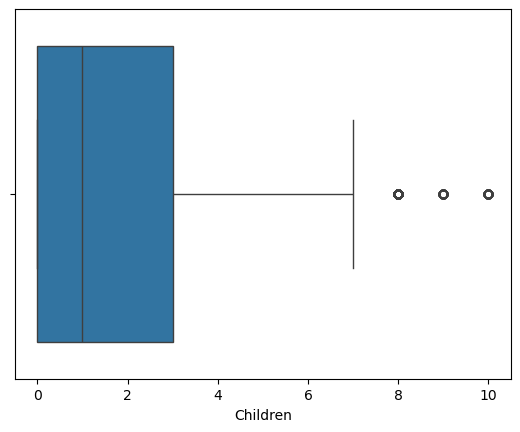

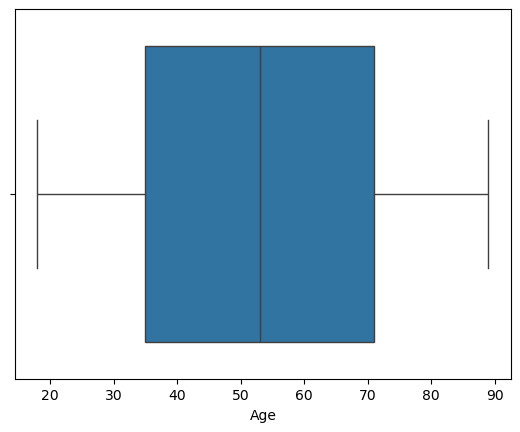

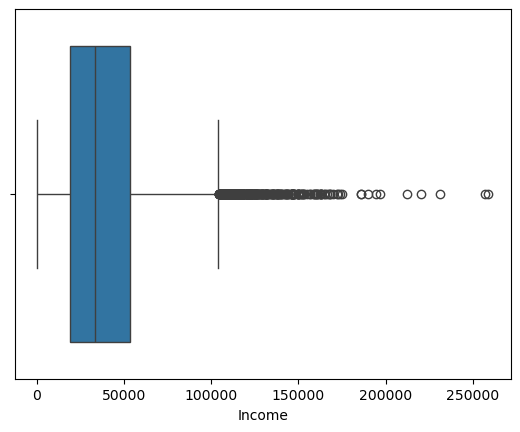

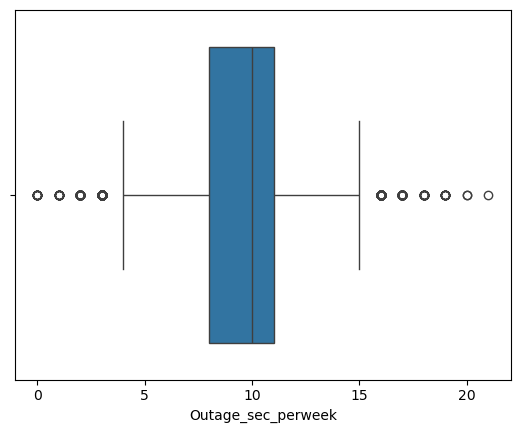

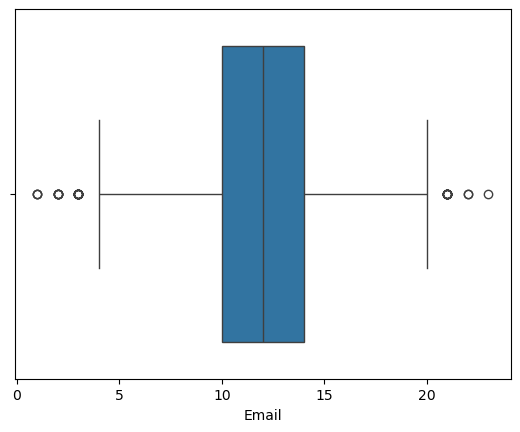

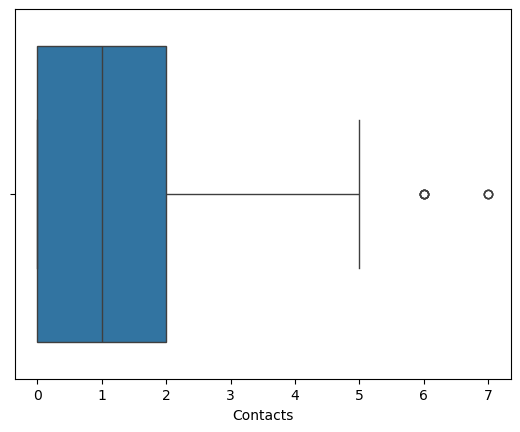

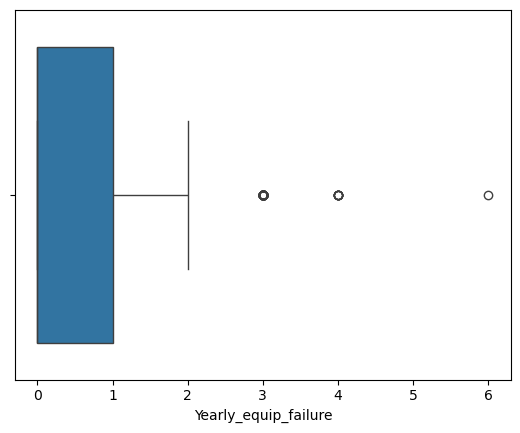

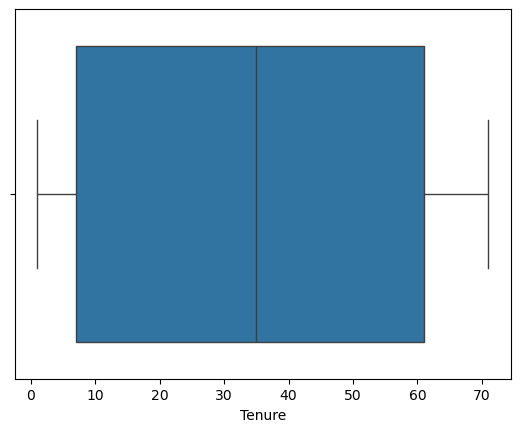

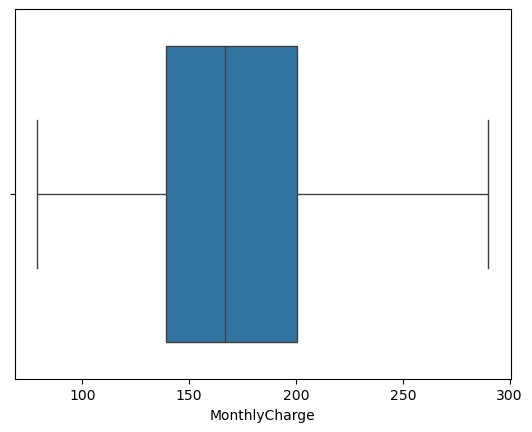

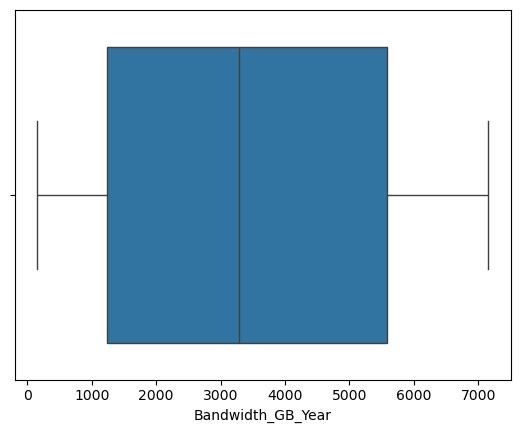

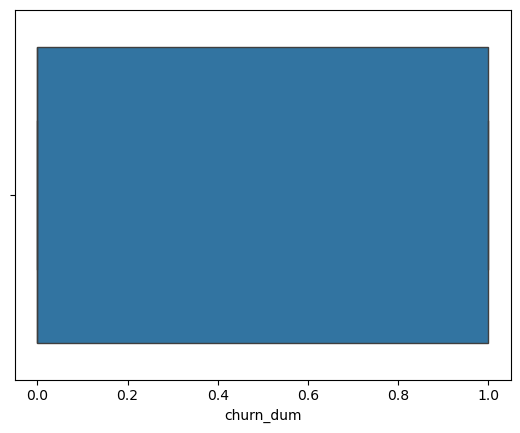

In [22]:
for column in df:
    plt.figure()    
    sns.boxplot(data = df, x = column)
    plt.show()
    ;

<Figure size 640x480 with 0 Axes>

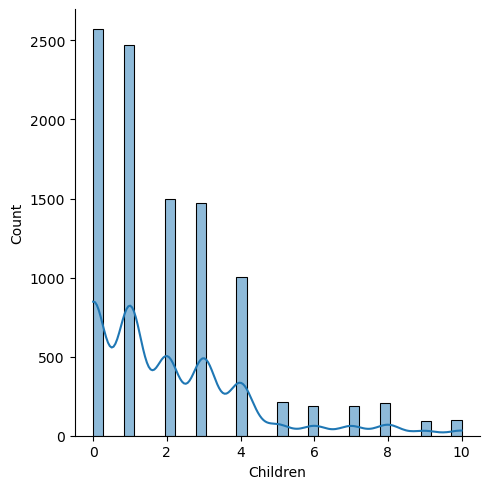

<Figure size 640x480 with 0 Axes>

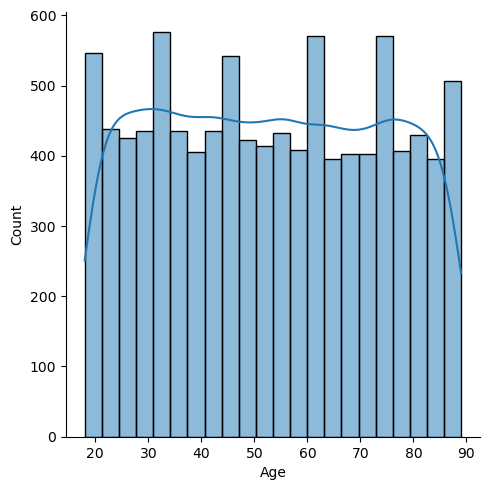

<Figure size 640x480 with 0 Axes>

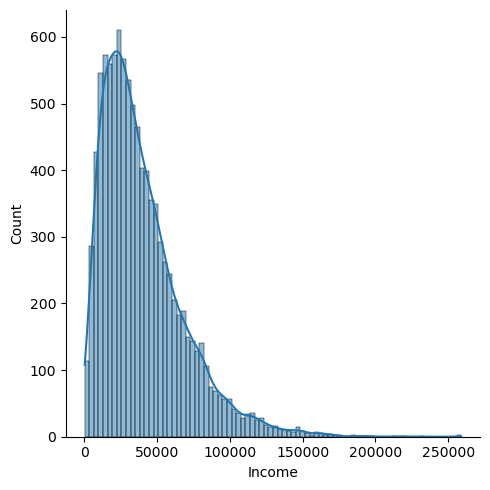

<Figure size 640x480 with 0 Axes>

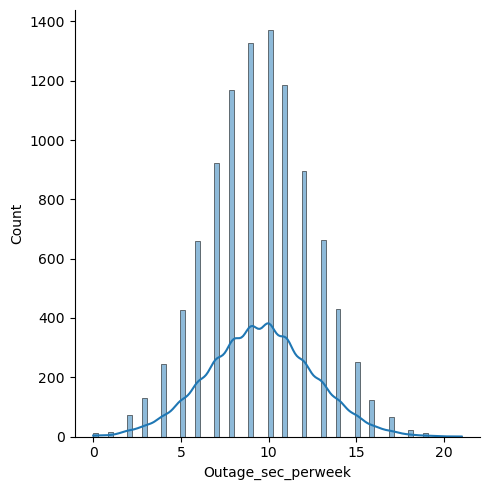

<Figure size 640x480 with 0 Axes>

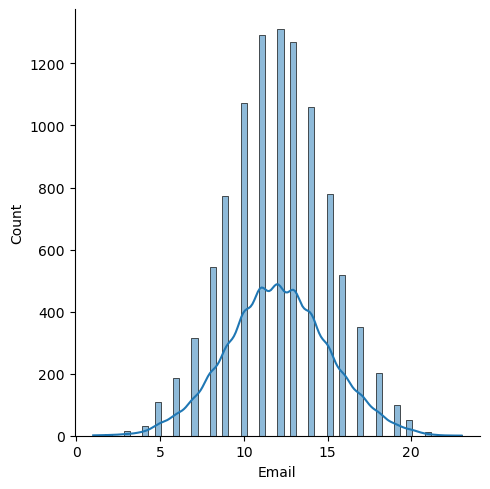

<Figure size 640x480 with 0 Axes>

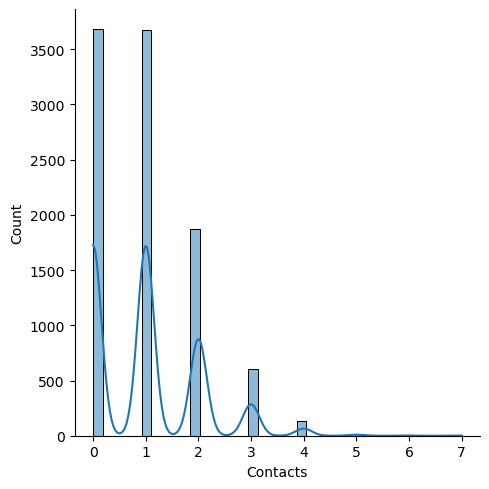

<Figure size 640x480 with 0 Axes>

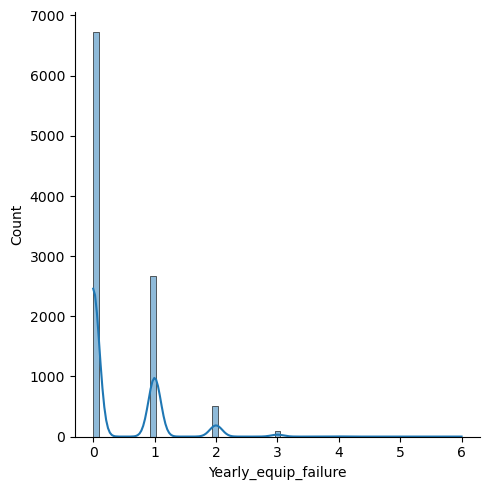

<Figure size 640x480 with 0 Axes>

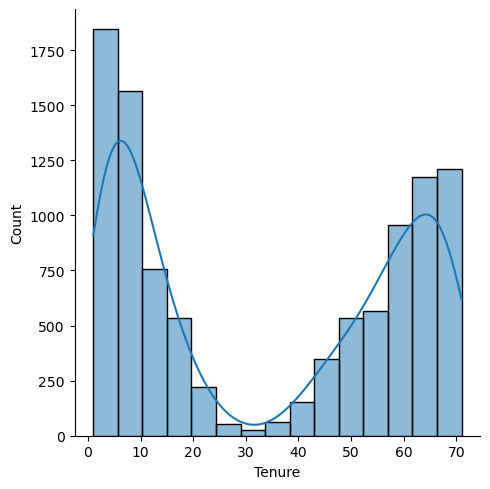

<Figure size 640x480 with 0 Axes>

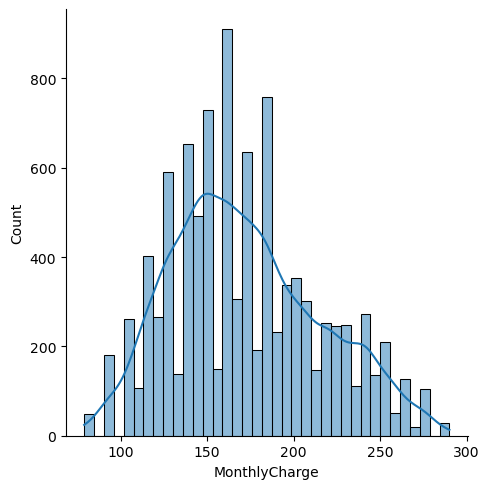

<Figure size 640x480 with 0 Axes>

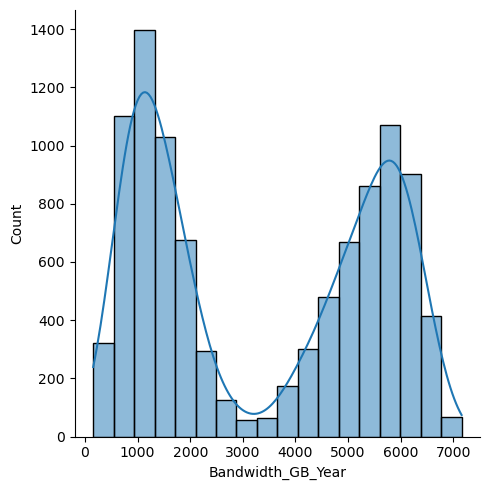

<Figure size 640x480 with 0 Axes>

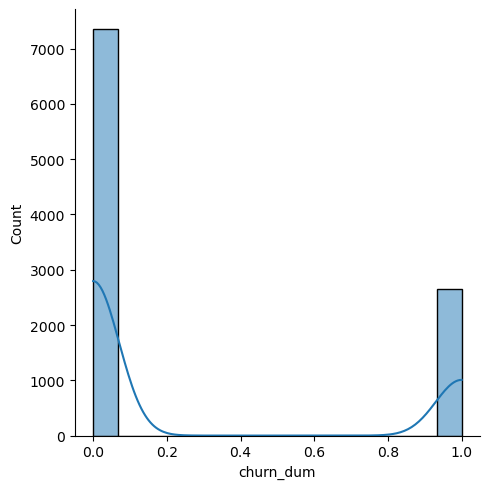

In [23]:
for column in df:
    plt.figure()    
    sns.displot(data = df, x =column, kde = True);

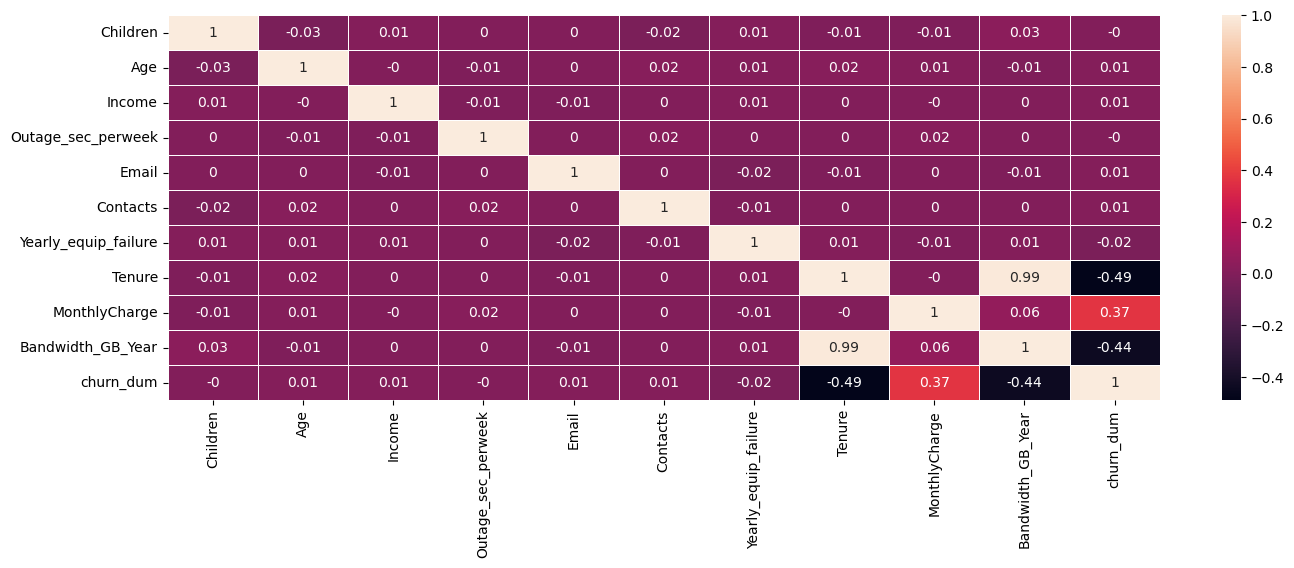

In [24]:
corrMatrix = df.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, linewidths=.5, annot=True)
plt.show()

### 4.  Provide a copy of the cleaned data set.

In [28]:
df.to_csv("C:\\Users\\matth\\Desktop\\DATA\\churn_pred.csv")

# Analysis


### 1.  Split the data into training and test data sets and provide the file(s).



In [29]:
# Run test train split with test size of .3
# set stratify to y to ensure balance samples 
# Setting random state to 42 to ensure same values in test train split on reruns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state= 42)

In [32]:
X_train.to_csv("C:\\Users\\matth\\Desktop\\DATA\\d209t2_X_train.csv")
X_test.to_csv("C:\\Users\\matth\\Desktop\\DATA\\d209t2_X_test.csv")
y_train.to_csv("C:\\Users\\matth\\Desktop\\DATA\\d209t2_y_train.csv")
y_test.to_csv("C:\\Users\\matth\\Desktop\\DATA\\209t2_y_test.csv")

Analysis technique used for this review will be random forest. Random forest is a classification technique using several decisions trees. It uses bagging or bootstrapping or more simply put taking several random samples using replacement to infer the population. 

The goal of this is to create an uncorrelated "forest" of decision trees to predict using  multiple layers rather than  as single decision tree. Finally evaluate the test set with classifcation report MSE(Mean standard error).

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE

In [34]:
#insatiate the initial model
rf = RandomForestRegressor(n_estimators=50, min_samples_leaf=0.12, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred


array([0.28455023, 0.14613125, 0.74671739, ..., 0.14613125, 0.00932411,
       0.00932411])

In [35]:
#### evaluate best estimator

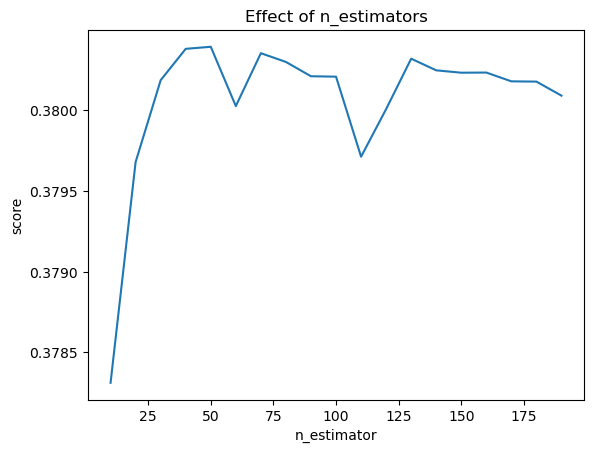

In [36]:
# Try different estimators
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

# Part V: Data Summary and Implications


#### Accuracy

In [37]:
print(rf.score(X_test, y_test))

0.3800910401655012


Score gives the r2 score and in this case .38 shows a weak coorelation. 

#### MSE

In [38]:
print(MSE(y_test, y_pred))

0.12068377308127286


MSE represents the mean squared errors. This metric allows for large errors to have greater impacts. MSE determines distance from the data to the regression to determine accuracy. The lower the MSE the model can be interpreted as closer to the regression. 

The MSE score 0.12068377308127286
indicates statistically significant accuracy for this model. This means there is a high accuracy for correct prediction.


### 2.  Results and implications of your prediction analysis.



The MSE score 0.12075429067041958 indicates statistically significant accuracy for this model. This means there is a high accuracy for correct prediction. In other words the output of prediction numbers fall significantly close to the actual numbers. 
However with the R^2 score of 0.380393925907981 this is a weak score. To ensure what we are predicting is predicting a strong correlation to Churn we will want to re-evaluate the input features to this model. 

In [39]:
for i, item in enumerate(rf.feature_importances_):
    print(df.columns[i], item)

Children 0.0
Age 0.0
Income 0.0
Outage_sec_perweek 0.0
Email 0.0
Contacts 0.0
Yearly_equip_failure 0.0
Tenure 0.6057999390064388
MonthlyCharge 0.39420006099356114
Bandwidth_GB_Year 0.0


Base on this output I would recommend a review of only Tenure and MonthlyCharge

### 3.  Discuss one limitation of your data analysis.



This data was created over a small sample data set. If this were to be put into a production environment there is a potential for serious lag or inability to perform near real time answers. While the models train data quickly predictions can move slower due to the number of trees and size of data processing. 

### 4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

Recommendation is further review by business leaders with features highlighted in this analysis to create incentive programs internally with our employed or externally to our customers to increase likelihood of these predictors of Churn having more of a control in favor of not churning. Features used in this analysis were 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email','Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',' Bandwidth_GB_Year'. Examples of internal programs would be to create goals around Outage seconds perweek in order to reduce down time. There is also a Positive correlation with Tenure so creating incentives for customers to stay customers longer will create loyalty and reduce churn.


# G. Sources for Third-Party Code   # H. Sources
Source for third party code or information were derived through some of my previous work and courses. No specific websites other than research and troubleshooting errors via Stackoverflow or tutorials.
There should be no in text citations. Material in this word document was moved from my Jupyter Notebook Analysis. 